In [2]:
from __future__ import absolute_import

from nngp import GP, DKL
from nngp.kernels import RBFKernel, MaternKernel
from nngp import utils

import numpy as np
import matplotlib.pyplot as plt

# Optionally set default precision to 'double' for stability/robustness
# import jax
# jax.config.update("jax_enable_x64", True)

## Piecewise 1

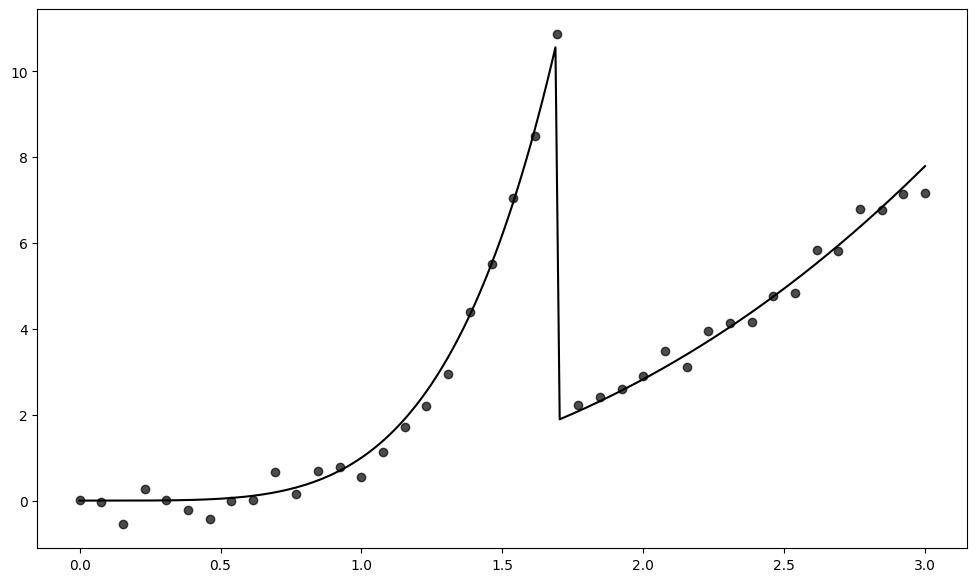

In [8]:
# Generate synthetic data
X, X_test, y, y_test = utils.piecewise1(num_points=40, random_seed=None)

# Add small observational noise
y = np.random.normal(y, scale=0.2)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='k', alpha=0.7)
plt.plot(X_test, y_test, c='k')

### GP

In [9]:
# Initialize standard GP model
model = GP(1, MaternKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make a prediction on full/test inputs
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [00:15<00:00, 264.17it/s, 3 steps of size 6.17e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      0.40      0.11      0.38      0.24      0.57   1268.32      1.00
    k_scale     10.70      5.00      9.68      4.19     17.17   1154.61      1.00
      noise      1.15      0.41      1.08      0.56      1.75   1319.56      1.00



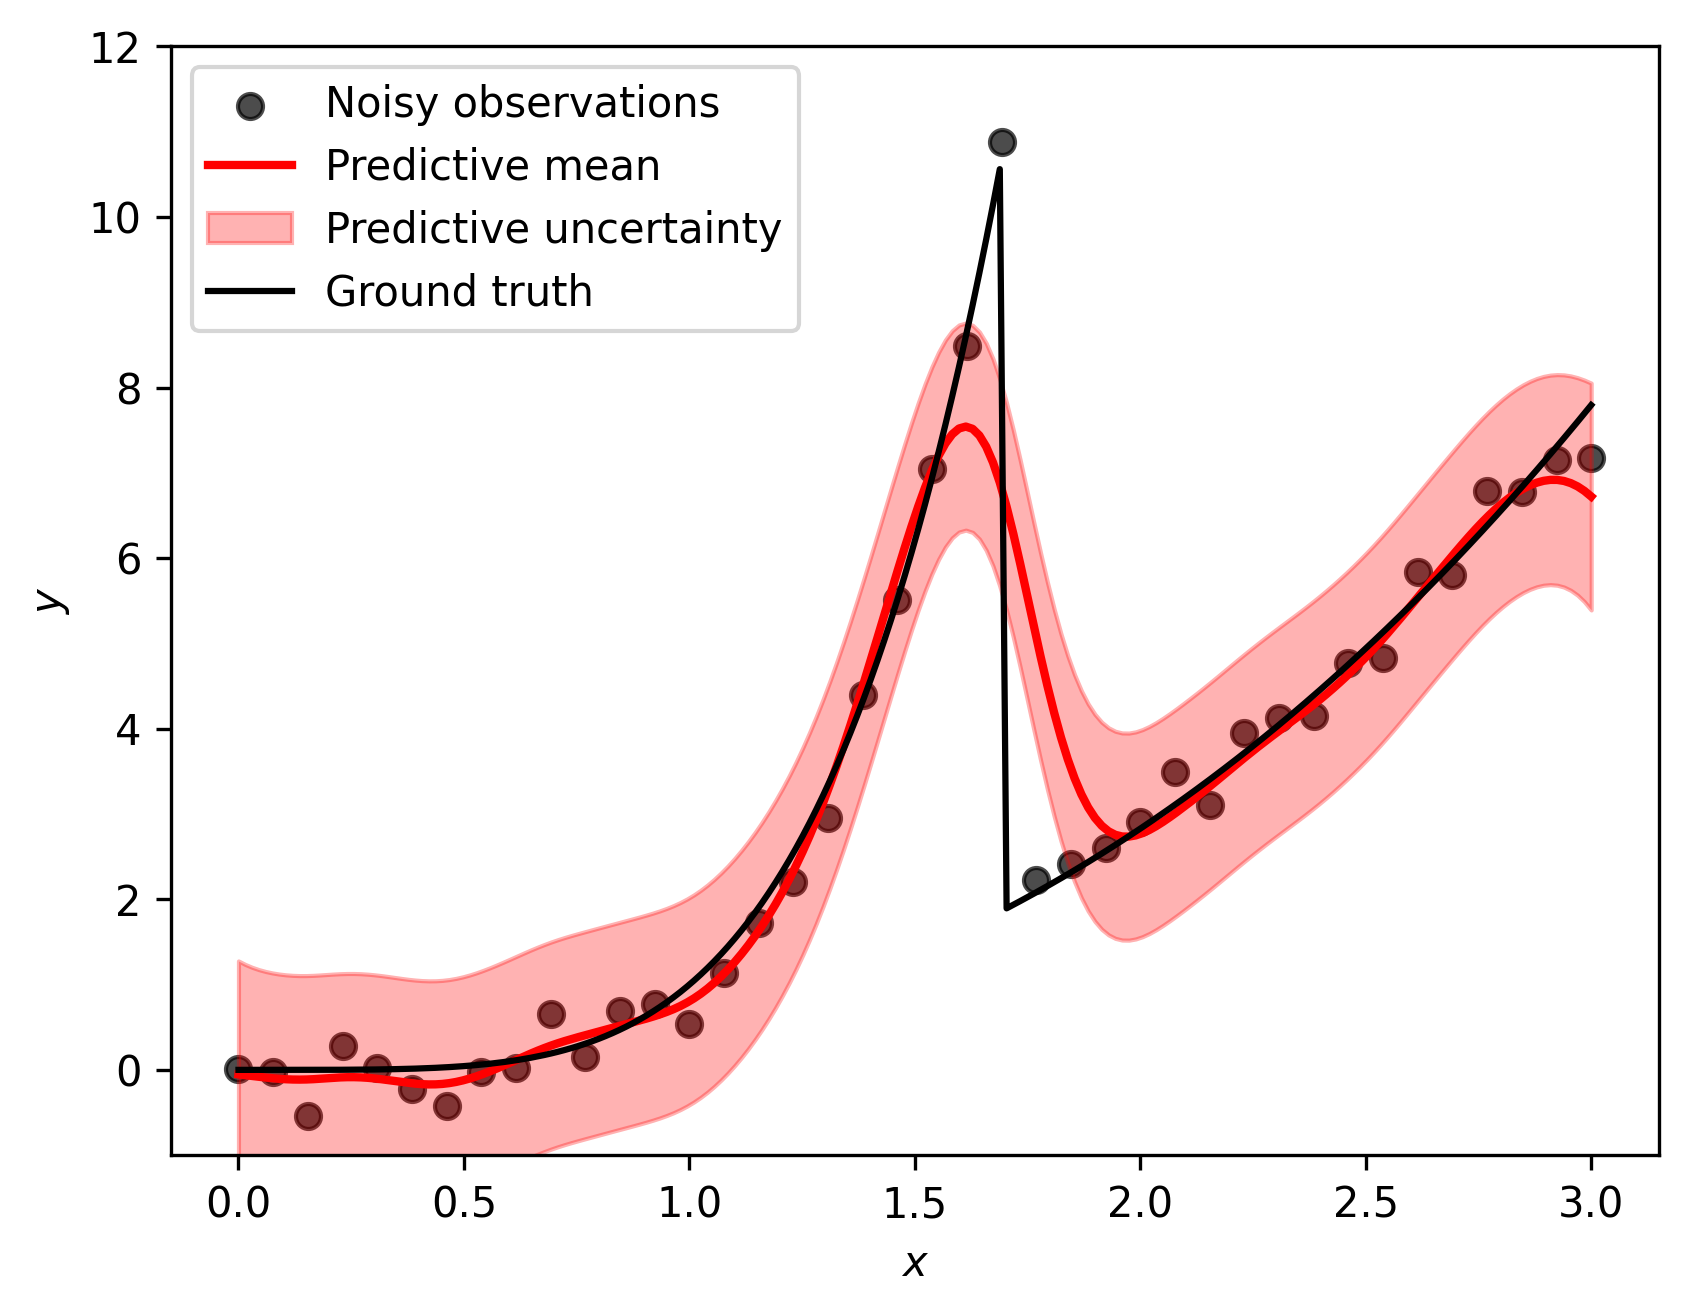

In [10]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1, 12)
ax.legend(loc='upper left')

### DKL

In [11]:
# Initialize DKL model with 2 latent dimensions
model = DKL(1, 2, RBFKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make prediciton on full/test data
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [16:01<00:00,  4.16it/s, 1023 steps of size 2.09e-08. acc. prob=0.44]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      0.24      0.00      0.24      0.24      0.24      0.50      1.00
k_length[1]      1.14      0.00      1.14      1.14      1.14      3.53      1.99
    k_scale     38.60      0.00     38.60     38.60     38.60      0.50      1.00
      noise      0.05      0.00      0.05      0.05      0.05      0.50      1.00



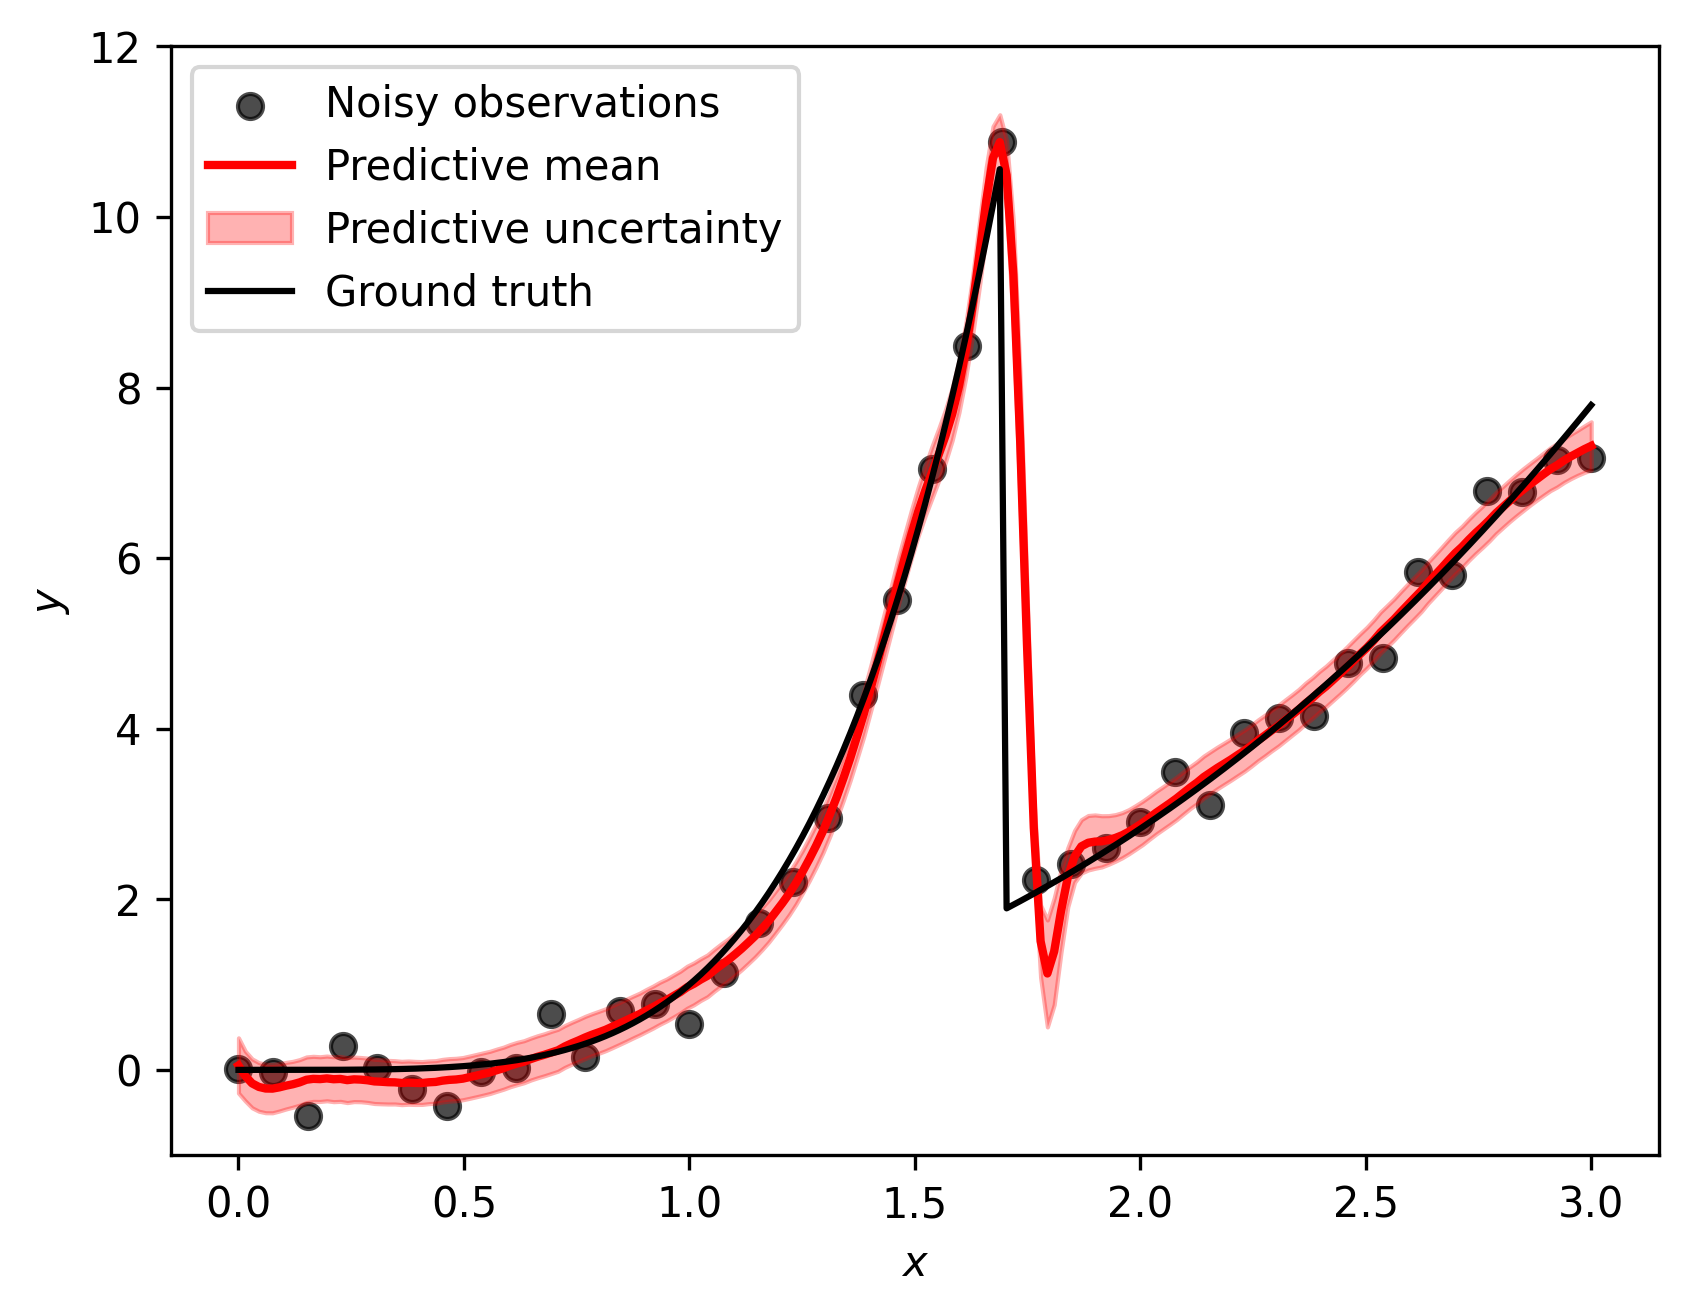

In [12]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1, 12)
ax.legend(loc='upper left')

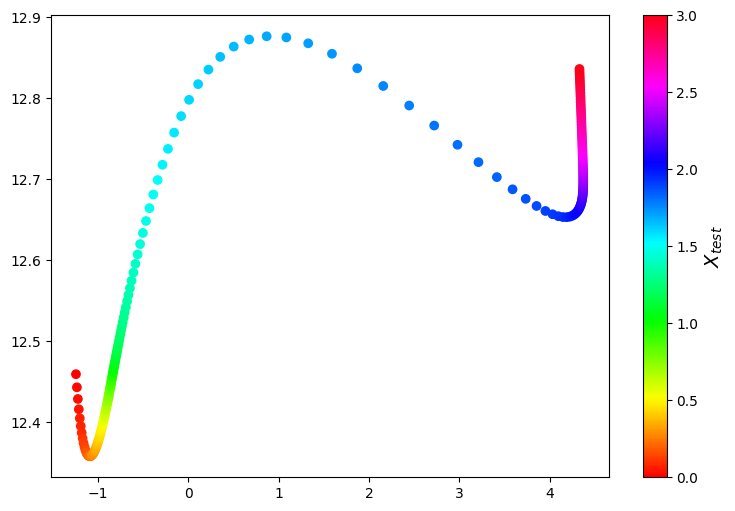

In [14]:
# Embed input data into the latent space of the trained DKL model
z_samples = model.embed(X_test[:, None])
# Avarage over the HMC samples
z_mean = z_samples.mean(0)

# Plot the embedding
plt.figure(figsize=(9, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 0], c=X_test, cmap='hsv')
cbar = plt.colorbar()
cbar.set_label('$X_{test}$', fontsize=14)

## Piecewise 2

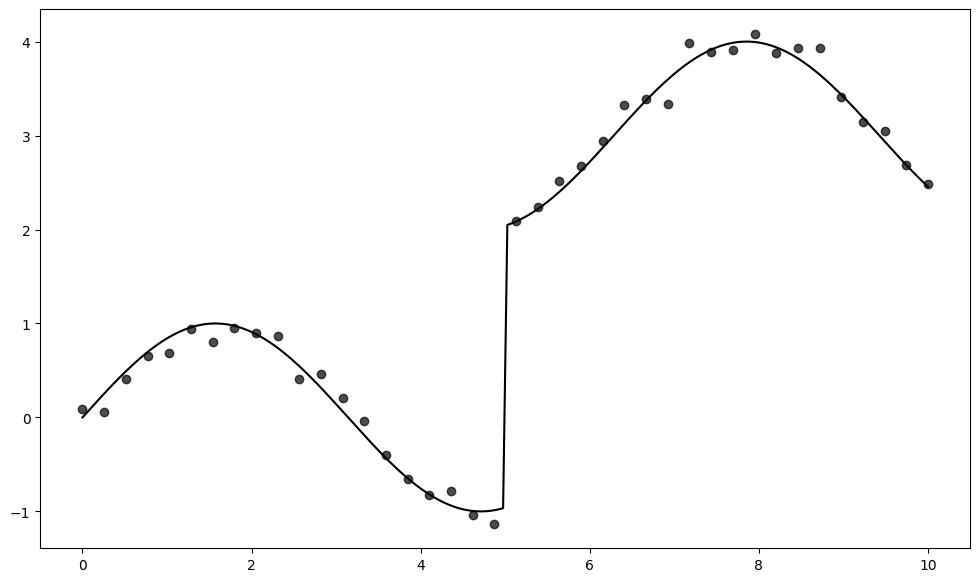

In [21]:
# Generate synthetic data
X, X_test, y, y_test = utils.piecewise2(num_points=40, random_seed=None)

# Add small observational noise
y = np.random.normal(y, scale=0.1)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='k', alpha=0.7)
plt.plot(X_test, y_test, c='k')

### GP

In [22]:
# Initialize standard GP model
model = GP(1, MaternKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make a prediction on full/test inputs
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [00:13<00:00, 290.80it/s, 3 steps of size 6.31e-01. acc. prob=0.92] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.78      0.41      1.74      1.09      2.40   1392.64      1.00
    k_scale      3.58      1.85      3.11      1.24      5.92   1111.42      1.00
      noise      0.15      0.05      0.15      0.08      0.23   1391.50      1.00



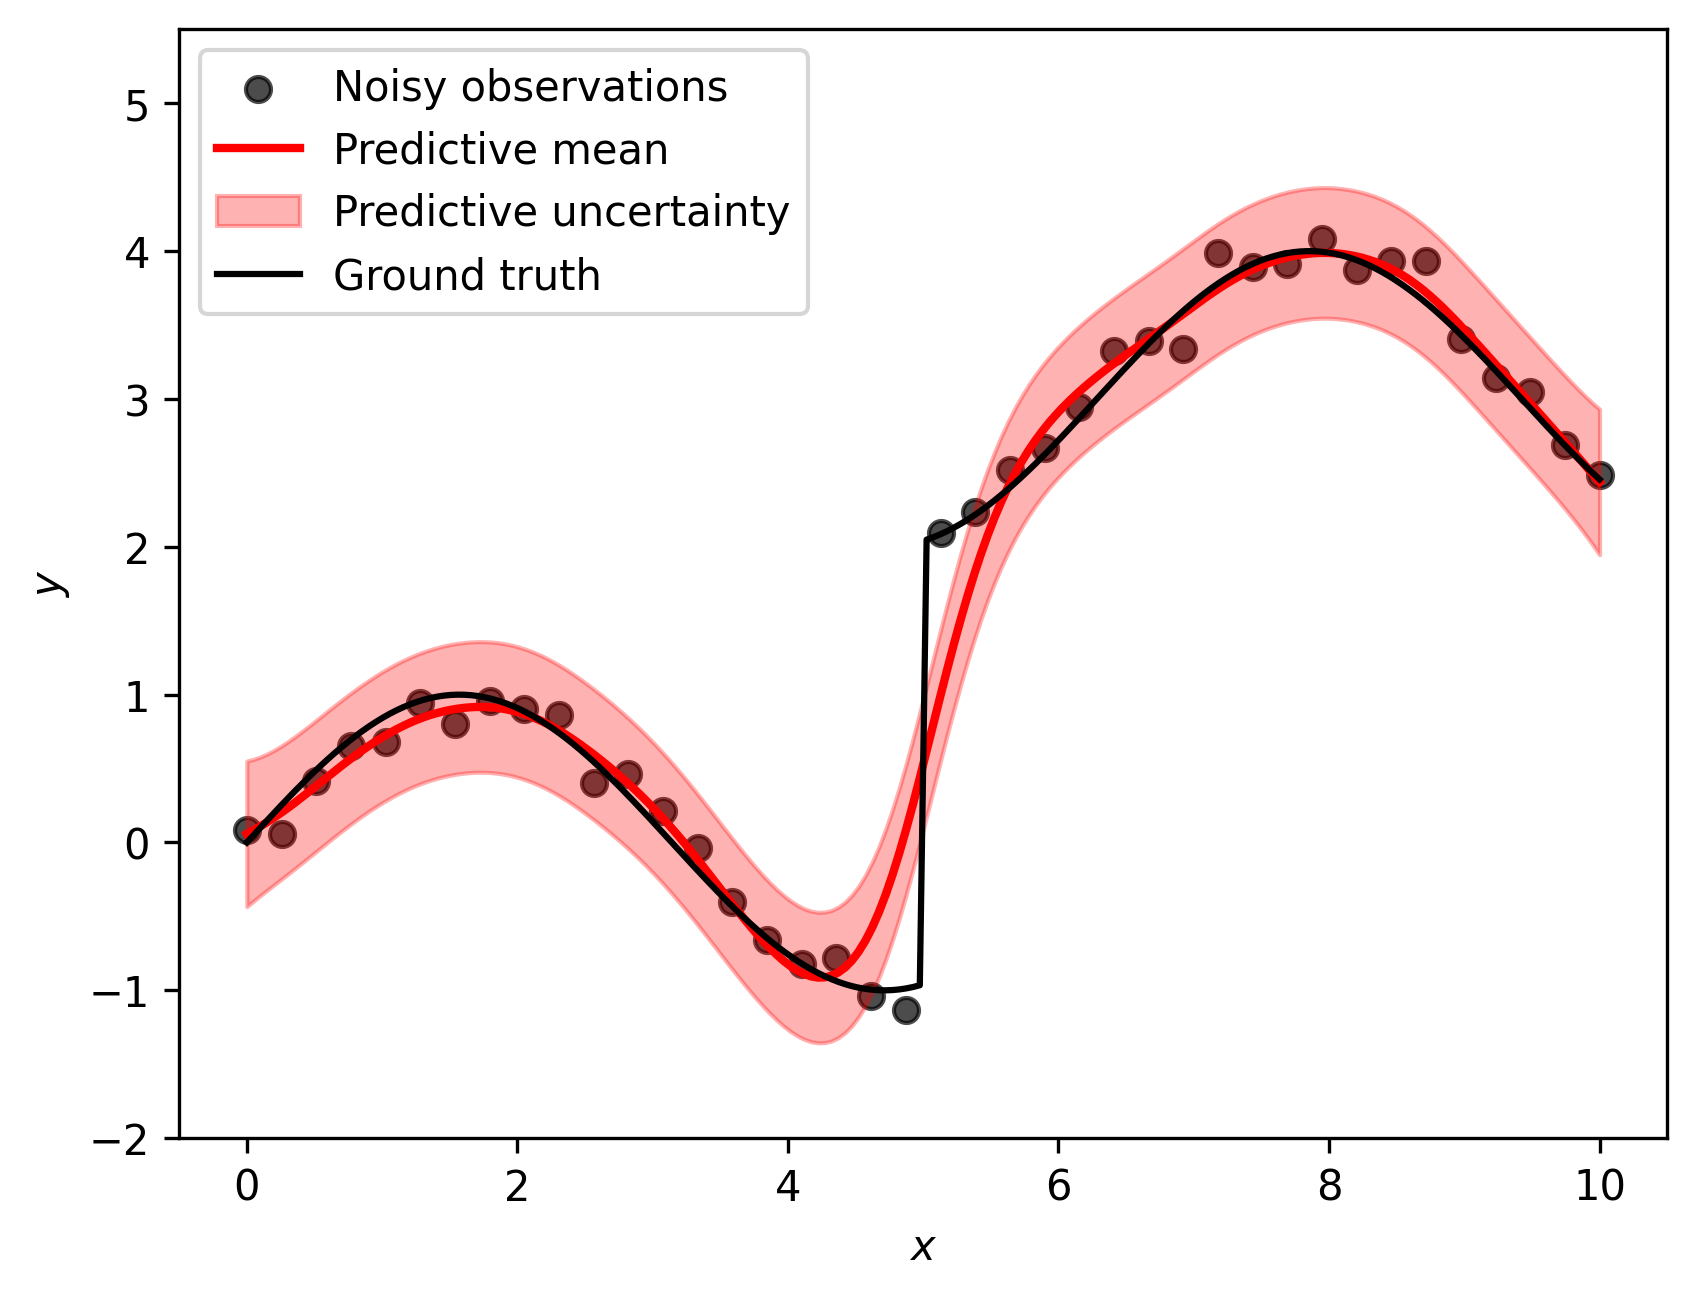

In [23]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-2.0, 5.5)
ax.legend(loc='upper left')

### DKL

In [24]:
# Initialize DKL model with 2 latent dimensions
model = DKL(1, 2, RBFKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make prediciton on full/test data
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [16:06<00:00,  4.14it/s, 1023 steps of size 1.39e-03. acc. prob=0.78]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.28      1.11      1.00      0.20      2.42    209.26      1.00
k_length[1]      1.55      1.25      1.21      0.24      3.01    183.64      1.00
    k_scale      3.69      2.22      3.11      0.92      6.46    121.11      1.00
      noise      0.03      0.01      0.02      0.01      0.04    211.03      1.00



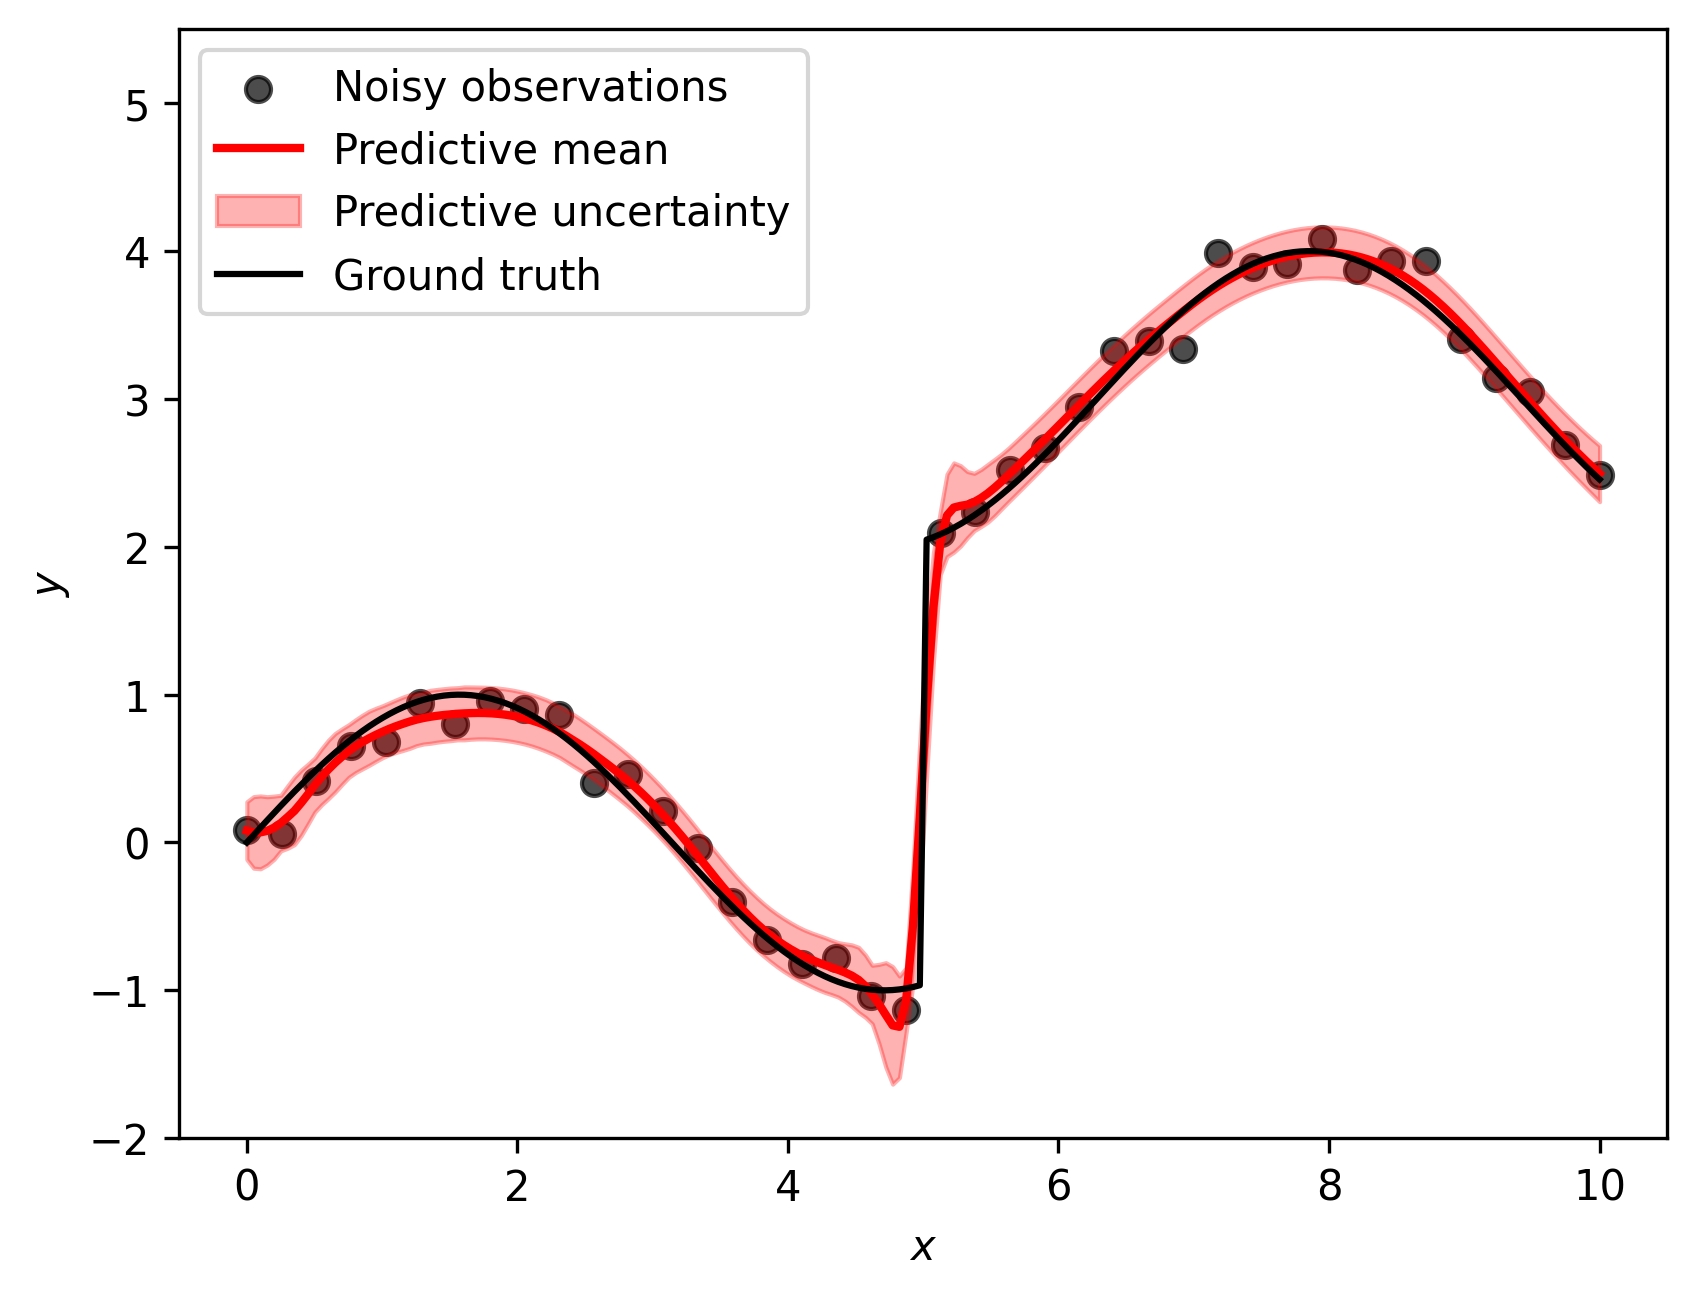

In [25]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-2.0, 5.5)
ax.legend(loc='upper left')

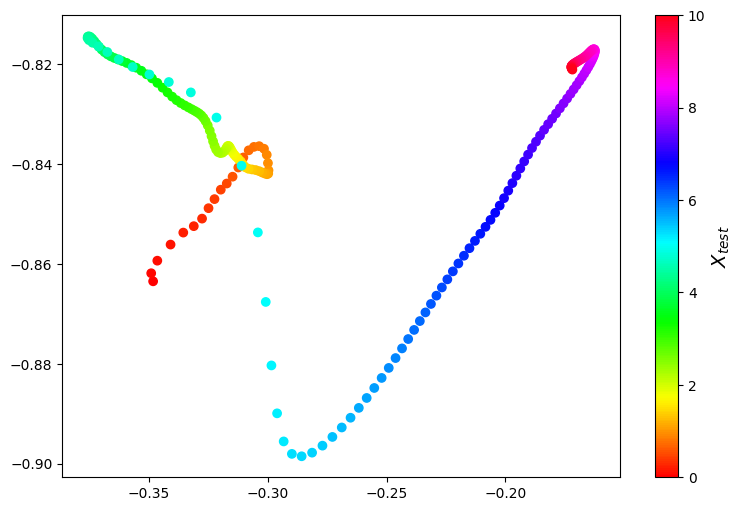

In [26]:
# Embed input data into the latent space of the trained DKL model
z_samples = model.embed(X_test[:, None])
# Avarage over the HMC samples
z_mean = z_samples.mean(0)

# Plot the embedding
plt.figure(figsize=(9, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 0], c=X_test, cmap='hsv')
cbar = plt.colorbar()
cbar.set_label('$X_{test}$', fontsize=14)

### Piecewise 3

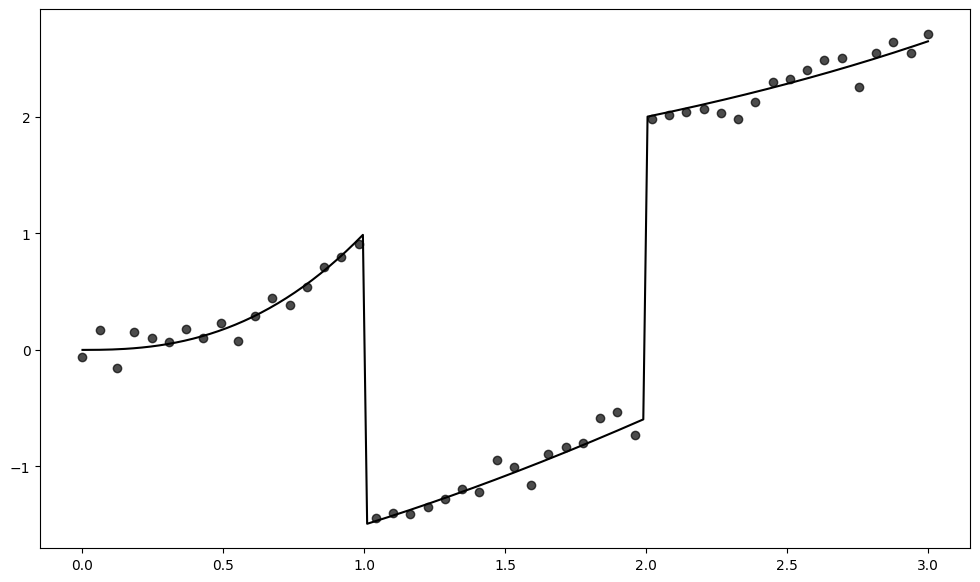

In [34]:
# Generate synthetic data
X, X_test, y, y_test = utils.piecewise3(num_points=50, random_seed=None)

# Add small observational noise
y = np.random.normal(y, scale=0.1)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='k', alpha=0.7)
plt.plot(X_test, y_test, c='k')

### GP

In [35]:
# Initialize standard GP model
model = GP(1, MaternKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make a prediction on full/test inputs
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [00:23<00:00, 169.85it/s, 3 steps of size 5.42e-01. acc. prob=0.93] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      0.41      0.12      0.39      0.22      0.57    974.90      1.00
    k_scale      2.22      1.21      1.89      0.71      3.82    993.42      1.00
      noise      0.15      0.05      0.15      0.08      0.23   1019.79      1.00



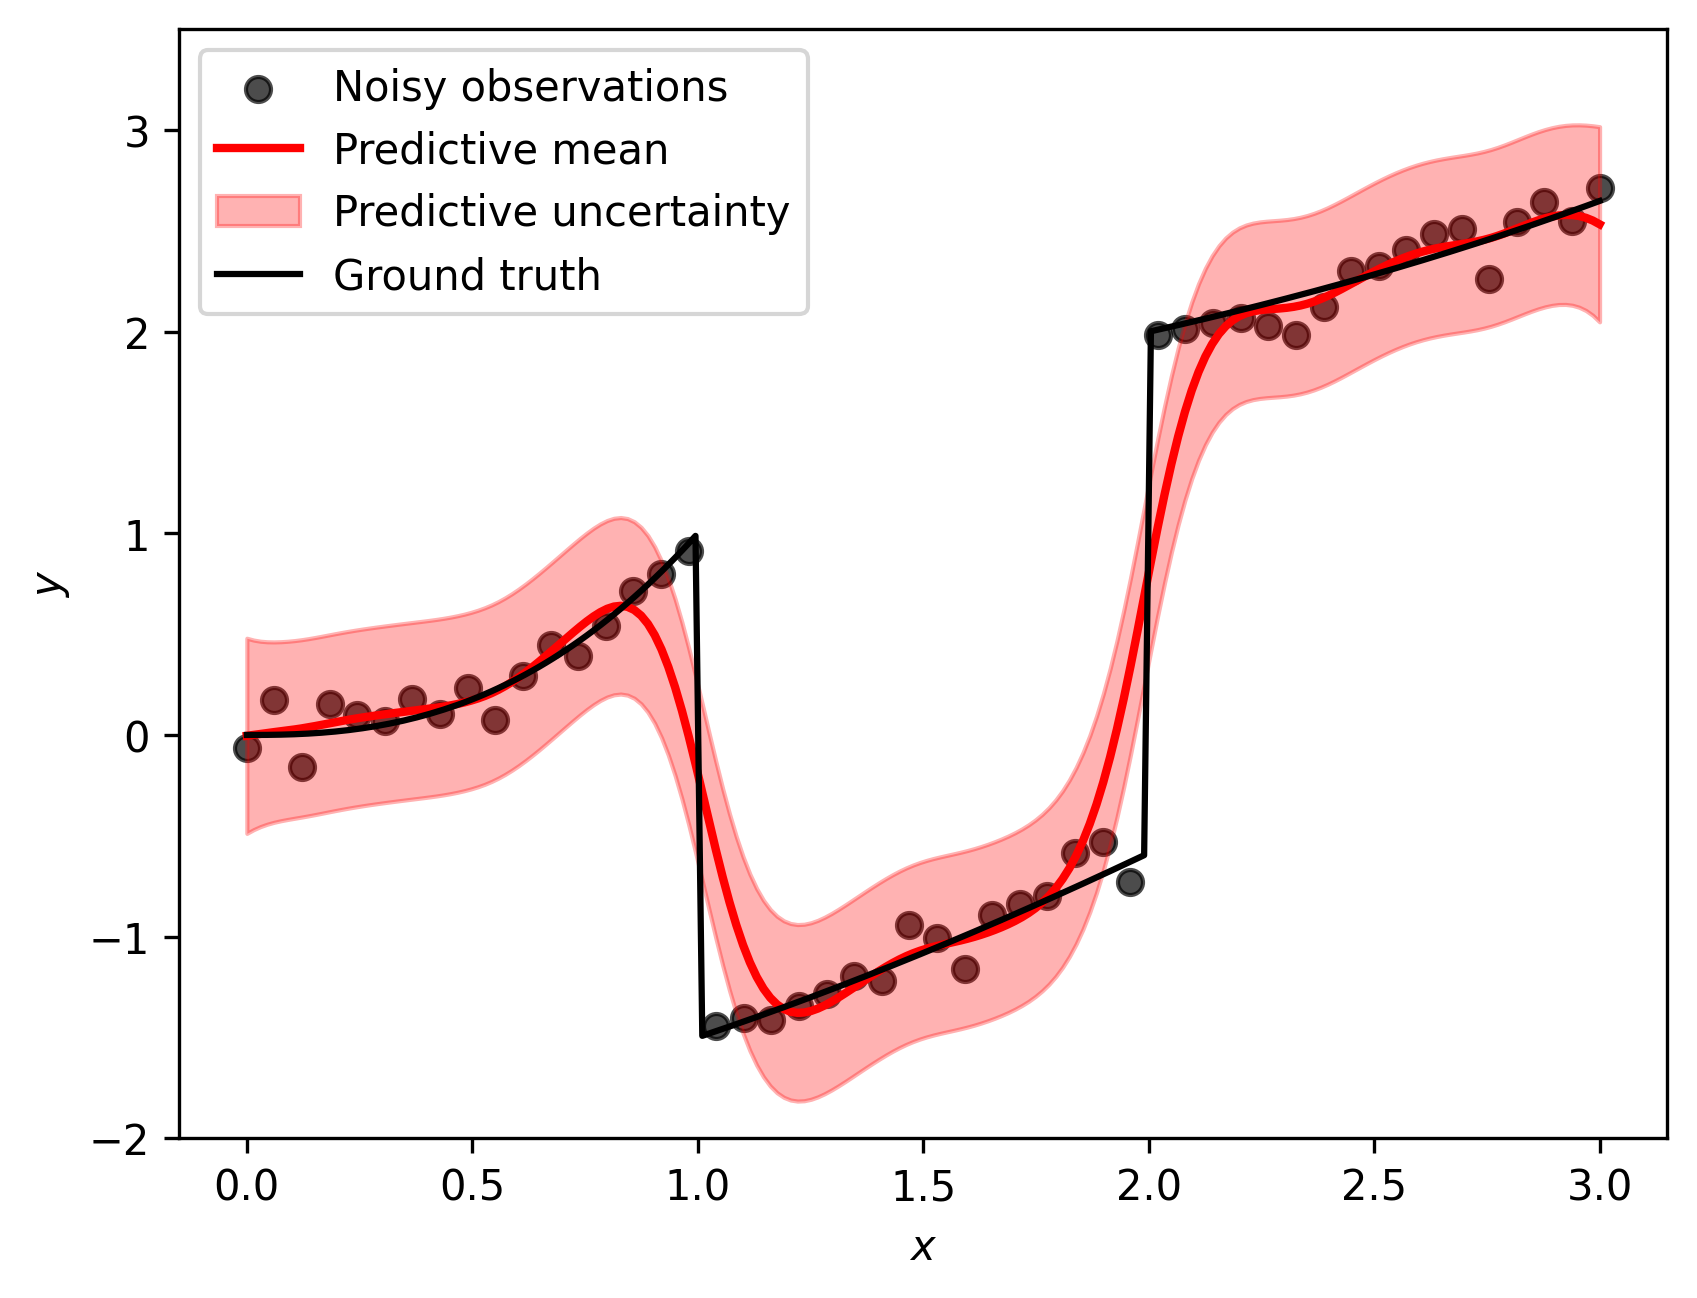

In [36]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-2.0, 3.5)
ax.legend(loc='upper left')

### DKL

In [40]:
# Initialize DKL model with 2 latent dimensions
model = DKL(1, 2, RBFKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make prediciton on full/test data
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [19:55<00:00,  3.35it/s, 1023 steps of size 7.50e-04. acc. prob=0.91]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.12      1.32      0.80      0.13      1.81     87.70      1.01
k_length[1]      1.12      0.83      0.85      0.28      2.37     94.16      1.00
    k_scale      2.05      1.23      1.64      0.62      3.84     77.53      1.00
      noise      0.01      0.00      0.01      0.01      0.02    112.13      1.00



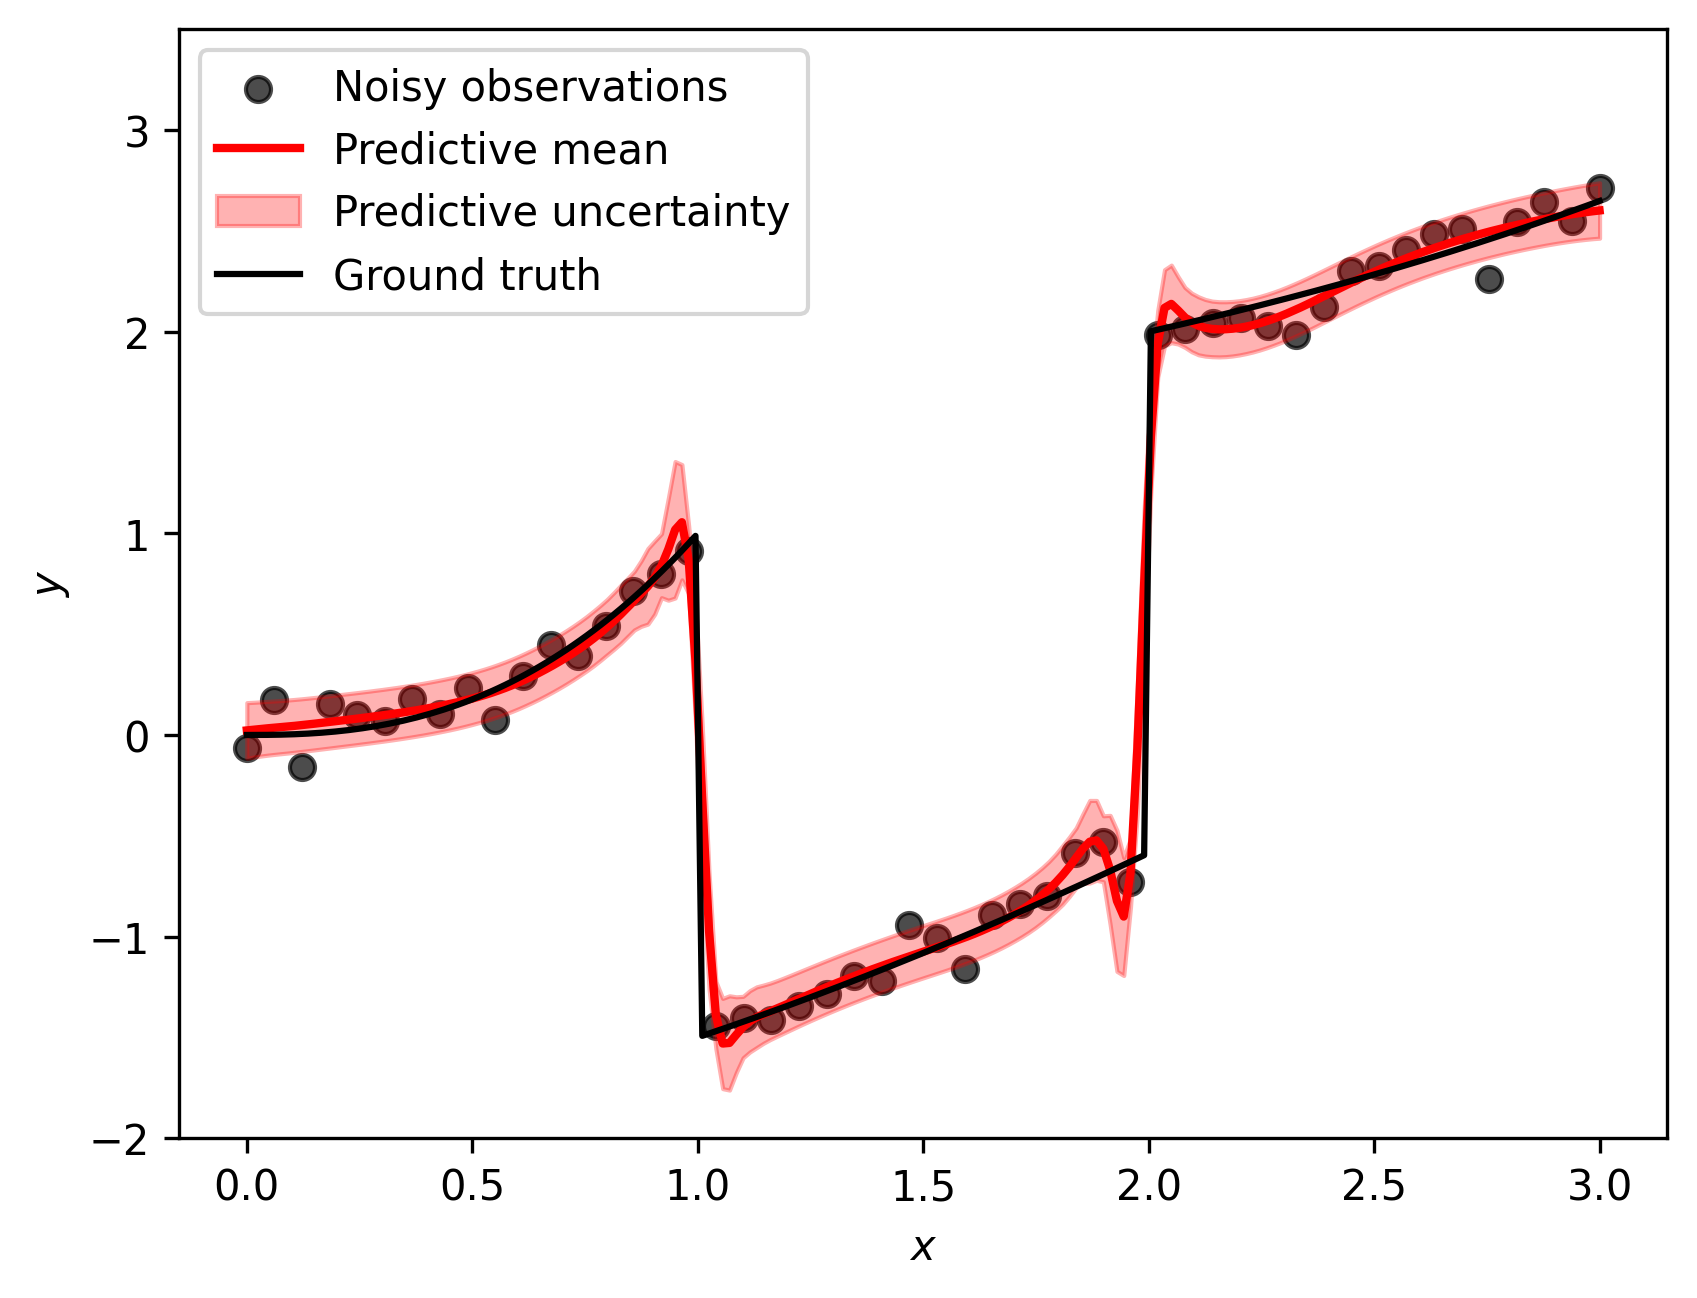

In [38]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-2.0, 3.5)
ax.legend(loc='upper left')

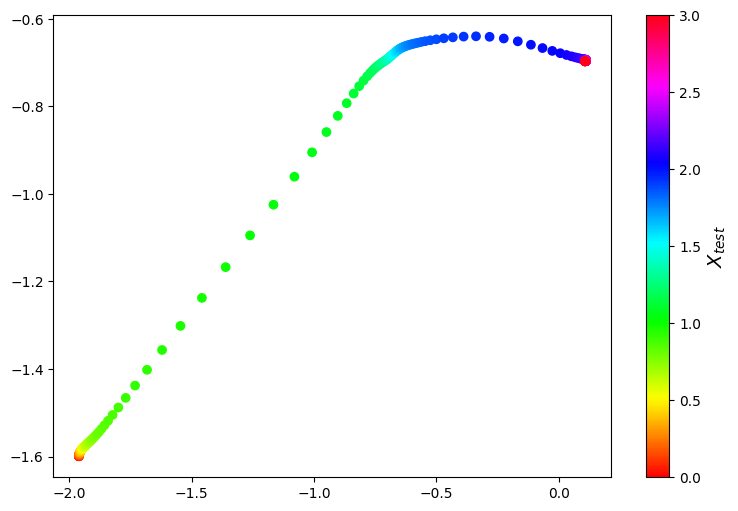

In [39]:
# Embed input data into the latent space of the trained DKL model
z_samples = model.embed(X_test[:, None])
# Avarage over the HMC samples
z_mean = z_samples.mean(0)

# Plot the embedding
plt.figure(figsize=(9, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 0], c=X_test, cmap='hsv')
cbar = plt.colorbar()
cbar.set_label('$X_{test}$', fontsize=14)